# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Load data
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Target distribution
print("\nTarget distribution:")
print(df['y'].value_counts())
print("\nPercentage distribution:")
print((df['y'].value_counts(normalize=True) * 100).round(2))


Shape: (41188, 21)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employ

## Customer Demographics Analysis

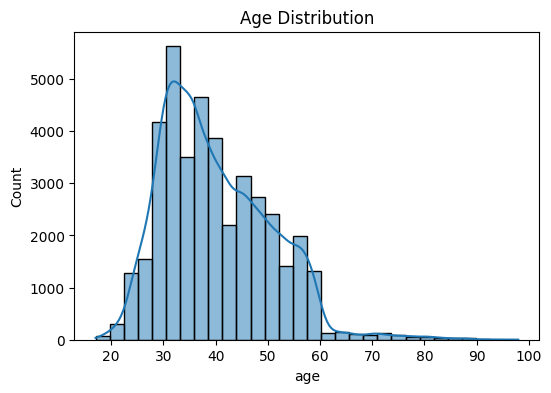

In [3]:
# Age distribution

plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


/tmp/ipython-input-3740657619.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette="viridis")


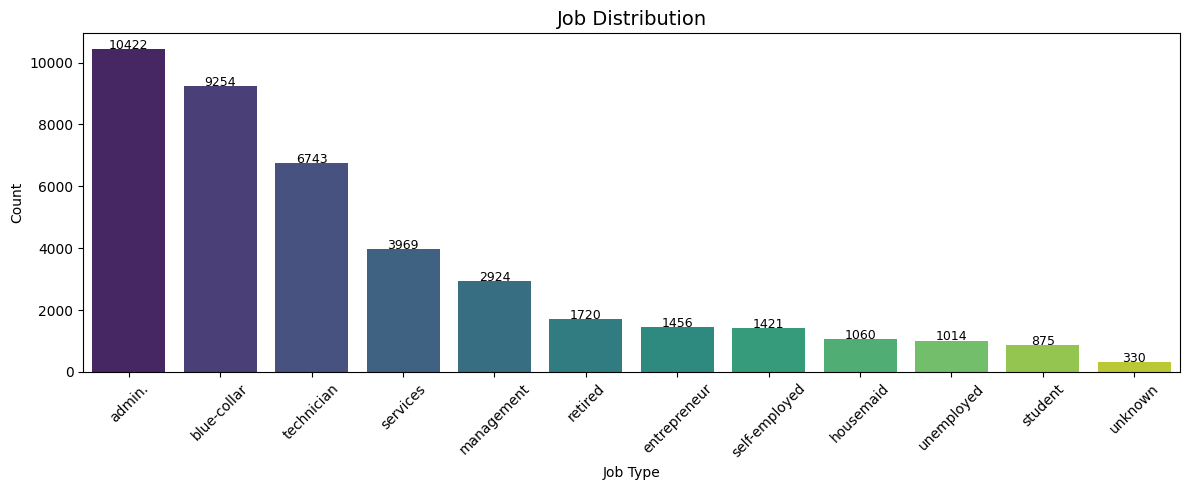

In [4]:
# Job distribution

plt.figure(figsize=(12,5))

job_counts = df['job'].value_counts()

sns.barplot(x=job_counts.index, y=job_counts.values, palette="viridis")

plt.title("Job Distribution", fontsize=14)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(job_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Balance & Deposit Trends

y
no     220.844807
yes    553.191164
Name: duration, dtype: float64


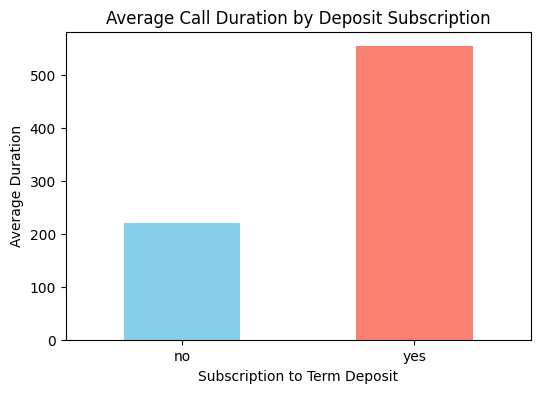

In [5]:
# Average balance by deposit subscription


avg_duration = df.groupby('y')['duration'].mean()
print(avg_duration)


plt.figure(figsize=(6,4))
df.groupby('y')['duration'].mean().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Average Call Duration by Deposit Subscription")
plt.xlabel("Subscription to Term Deposit")
plt.ylabel("Average Duration")
plt.xticks(rotation=0)
plt.show()





## Campaign Effectiveness

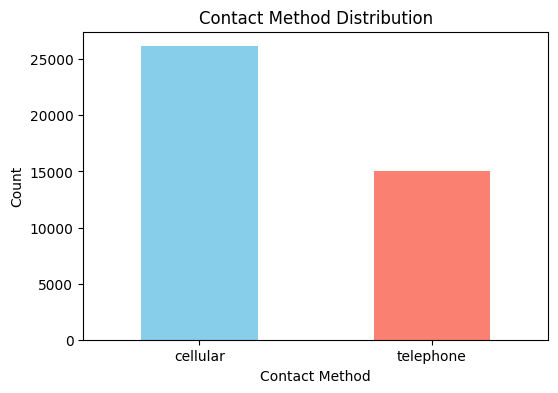

In [13]:
# Contact method analysis

plt.figure(figsize=(6,4))
df['contact'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Contact Method Distribution")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()





object int64
y_num
0    36548
1     4640
Name: count, dtype: int64
contact
cellular     0.147376
telephone    0.052313
Name: y_num, dtype: float64


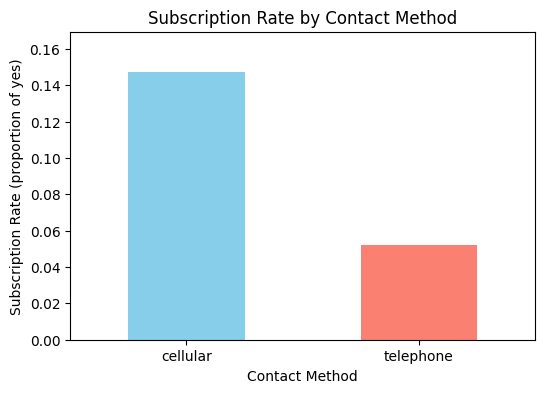

           count   sum  subscription_rate
contact                                  
cellular   26144  3853             0.1474
telephone  15044   787             0.0523


In [14]:
# 1) Convert target to numeric
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

# sanity check
print(df['y'].dtype, df['y_num'].dtype)
print(df['y_num'].value_counts())

# 2) Subscription rate by contact method (proportion of yes)
contact_sub = df.groupby('contact')['y_num'].mean().sort_values(ascending=False)
print(contact_sub)

# 3) Plot subscription rate by contact method
plt.figure(figsize=(6,4))
contact_sub.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Subscription Rate by Contact Method")
plt.xlabel("Contact Method")
plt.ylabel("Subscription Rate (proportion of yes)")
plt.ylim(0, contact_sub.max() * 1.15)
plt.xticks(rotation=0)
plt.show()

# 4) Also show raw counts for context
contact_counts = df.groupby('contact')['y_num'].agg(['count','sum'])
contact_counts['subscription_rate'] = (contact_counts['sum'] / contact_counts['count']).round(4)
print(contact_counts)


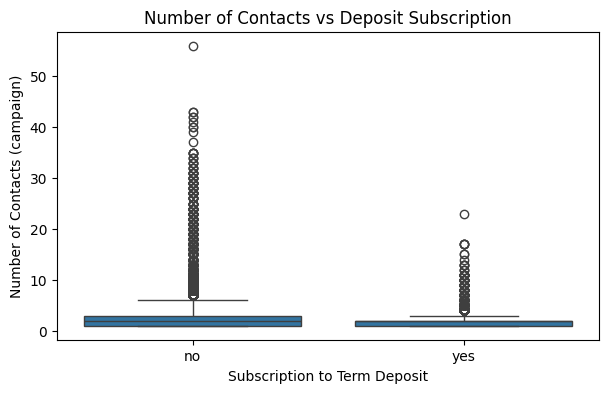

In [15]:
# Number of contacts vs deposit subscription

plt.figure(figsize=(7,4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title("Number of Contacts vs Deposit Subscription")
plt.xlabel("Subscription to Term Deposit")
plt.ylabel("Number of Contacts (campaign)")
plt.show()


In [16]:
avg_contacts = df.groupby('y')['campaign'].mean()
print("Average number of contacts:")
print(avg_contacts)


Average number of contacts:
y
no     2.633085
yes    2.051724
Name: campaign, dtype: float64


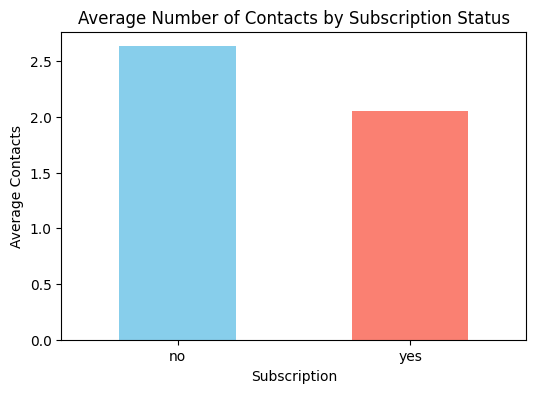

In [17]:
plt.figure(figsize=(6,4))
avg_contacts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Average Number of Contacts by Subscription Status")
plt.xlabel("Subscription")
plt.ylabel("Average Contacts")
plt.xticks(rotation=0)
plt.show()


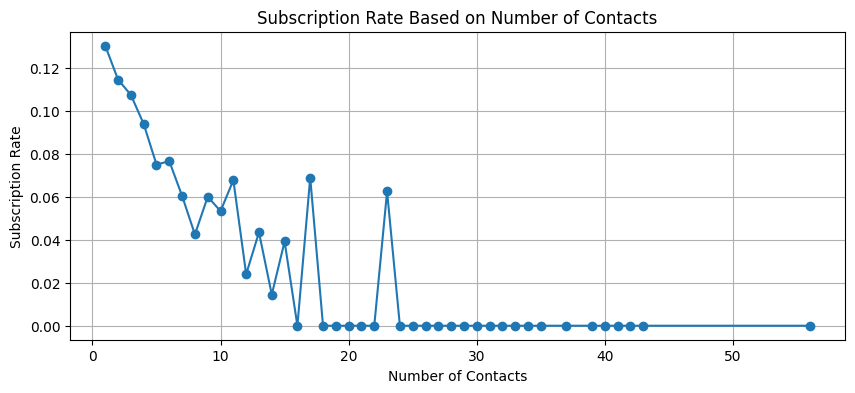

In [18]:
contact_rate = df.groupby('campaign')['y_num'].mean()

plt.figure(figsize=(10,4))
contact_rate.plot(marker='o')
plt.title("Subscription Rate Based on Number of Contacts")
plt.xlabel("Number of Contacts")
plt.ylabel("Subscription Rate")
plt.grid(True)
plt.show()


## Correlation Heatmap

In [19]:
# Correlation of numerical variables

# Select numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

num_df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
corr_matrix = num_df.corr()
corr_matrix


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


from matplotlib import pyplot as plt
corr_matrix['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['campaign'].plot(kind='hist', bins=20, title='campaign')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['pdays'].plot(kind='hist', bins=20, title='pdays')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x='age', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x='duration', y='campaign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x='campaign', y='pdays', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x='pdays', y='previous', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix['pdays'].plot(kind='line', figsize=(8, 4), title='pdays')
plt.gca().spines[['top', 'right']].set_visible(False)

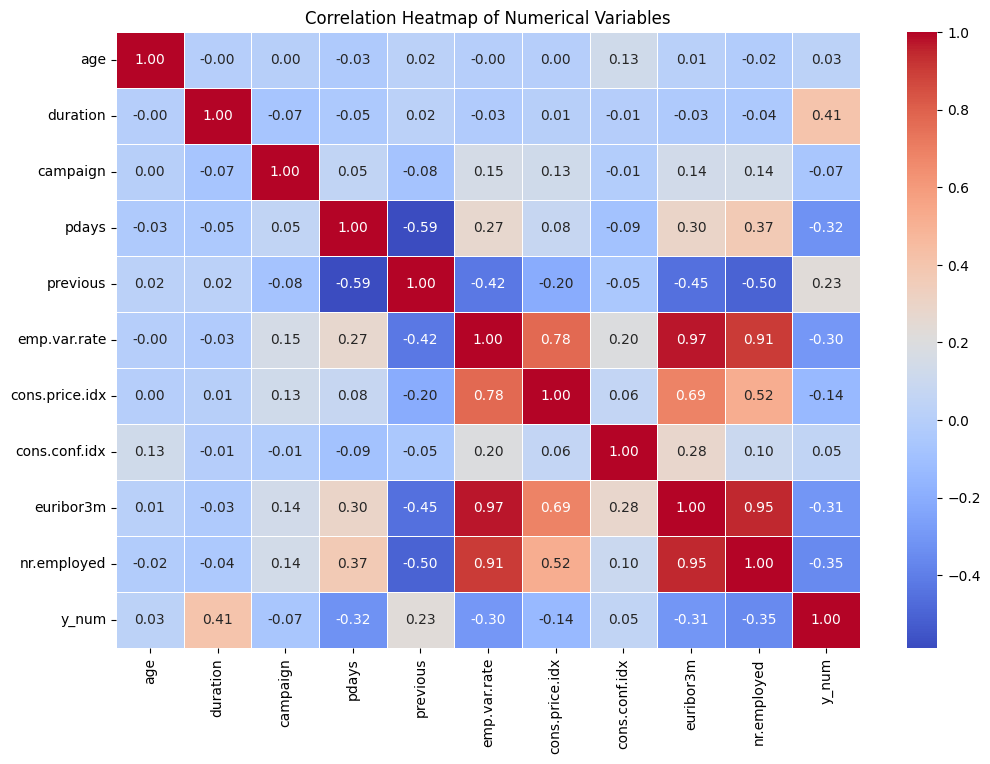

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [25]:
df['y_num'] = df['y'].map({'yes':1, 'no':0})

target_corr = corr_matrix['y_num'].sort_values(ascending=False)
print("Correlation of numeric features with subscription:")
print(target_corr)


Correlation of numeric features with subscription:
y_num             1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y_num, dtype: float64


## Predictive Modeling (Logistic Regression)

In [30]:
# Convert target column to numeric
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

X = df.drop(columns=['y', 'y_num'])
y = df['y_num']

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorial Columns: ", cat_cols)
print("\nNumerical Columns: ", num_cols)


# Encode categorical variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Predictions
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create pipeline: preprocessing + model
log_reg_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)
y_proba = log_reg_model.predict_proba(X_test)[:,1]


Categorial Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numerical Columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9166059723233795
Precision: 0.7117750439367311
Recall: 0.4364224137931034
F1 Score: 0.5410821643286573
ROC AUC: 0.9424372906740885


In [32]:
# Feature importance

# Get feature names after one hot encoding
ohe = log_reg_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(cat_cols)

all_features = np.concatenate([num_cols, encoded_cat_cols])

# Get model coefficients
coeff = log_reg_model.named_steps['classifier'].coef_[0]

# Create dataframe for importance
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coeff
})

# Sort by absolute importance
feature_importance = feature_importance.reindex(
    feature_importance.Coefficient.abs().sort_values(ascending=False).index
)

feature_importance.head(15)


,Feature,Coefficient
5,emp.var.rate,-2.600061
50,month_mar,1.640903
1,duration,1.199467
6,cons.price.idx,1.177989
49,month_jun,-0.766028
51,month_may,-0.754961
52,month_nov,-0.719316
44,contact_telephone,-0.657522
60,poutcome_failure,-0.619762
8,euribor3m,0.610467


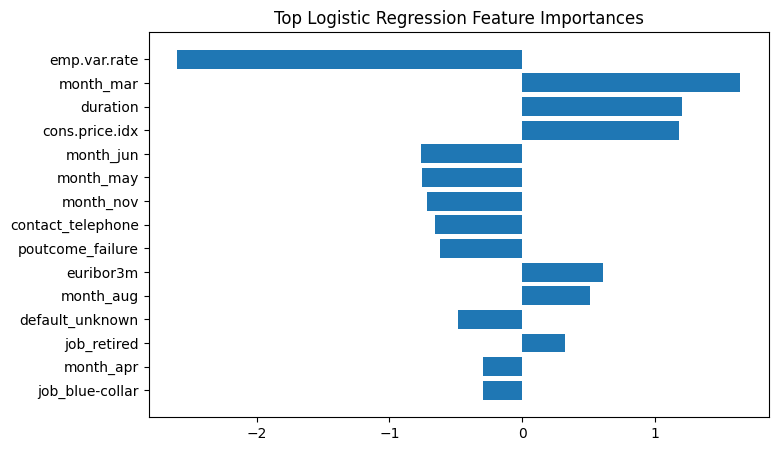

In [33]:
top_features = feature_importance.head(15)

plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.title("Top Logistic Regression Feature Importances")
plt.gca().invert_yaxis()
plt.show()


## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.